In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>


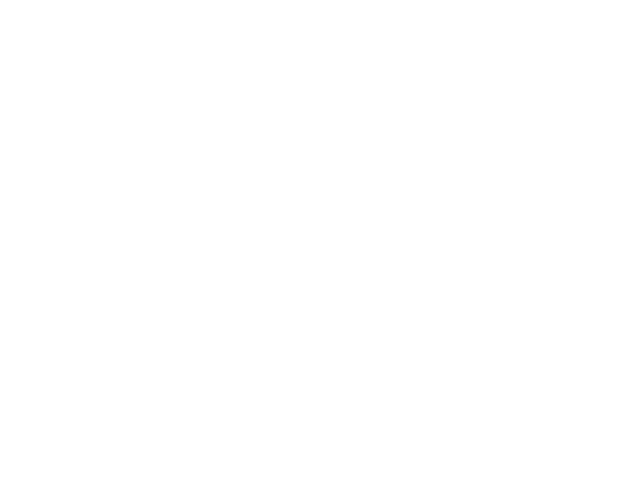

In [3]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

In [4]:
def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

7

In [5]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,origin,weight
0,0.881980,Chile,0.712756
1,0.982843,Germany,0.416520
2,0.059842,Iraq,0.881987
3,0.582735,Mexico,0.808634
4,0.795883,China,0.765493
5,0.921587,India,0.718510
6,0.856582,Canada,0.850172
7,0.276005,UK,0.920051
8,0.607049,Brazil,0.781926
9,0.584088,USA,0.081227


<IPython.core.display.Javascript object>


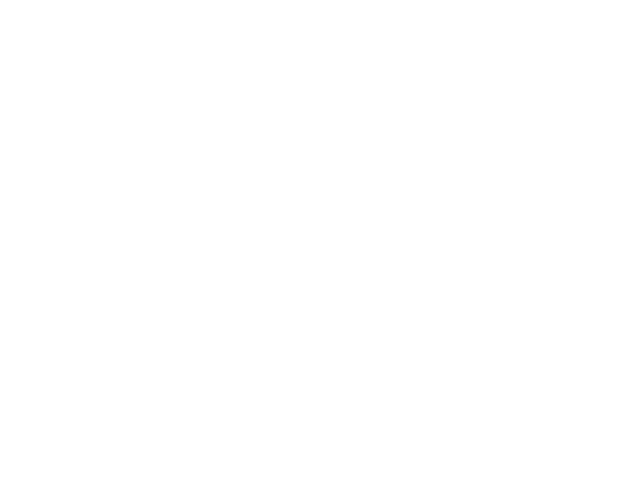

Text(0.5,0,'Height')

In [6]:
plt.figure(2)
#picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [7]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7

In [8]:
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [9]:
dfdscr = (df.T).describe()
dfdscr.loc['StdError'] = (dfdscr.loc['std'])/((dfdscr.loc['count'])**0.5)
dfdscr.loc['MarginOfError'] = dfdscr.loc['StdError']*1.96#*2?# That means the 95% confidence interval (using the +/-1.96 C factor)

#dfdscr

<IPython.core.display.Javascript object>


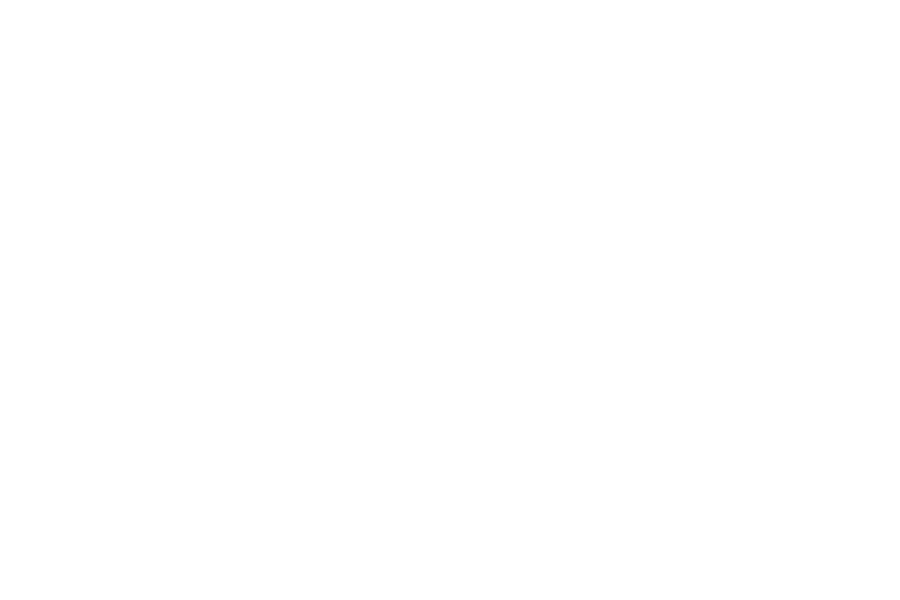

In [10]:
plt.figure(3, figsize=(9,6))

meanval = dfdscr.loc['mean'].values
meanval = meanval.tolist()
MarginOfError = dfdscr.loc['MarginOfError'].values
MarginOfError = MarginOfError.tolist()

bars = plt.bar(list(dfdscr), meanval, width = 0.9, picker=5)
bars
plt.errorbar(list(dfdscr), meanval, yerr=MarginOfError, fmt='None', ecolor='black', capsize=7, errorevery=1, dash_capstyle = 'round', capthick=1)
hLine = plt.axhline(y=30000, xmin=0, xmax=1, linewidth=2, color='y', picker=5)
hLine
graphs = [bars, hLine]

In [11]:
def onpick(event):
    #plt.gca().set_title('Selected item came from {}'.format(bars))
    plt.gca().set_title('Selected item came from {}'.format(graphs))

plt.gcf().canvas.mpl_connect('pick_event', onpick)

7

<IPython.core.display.Javascript object>


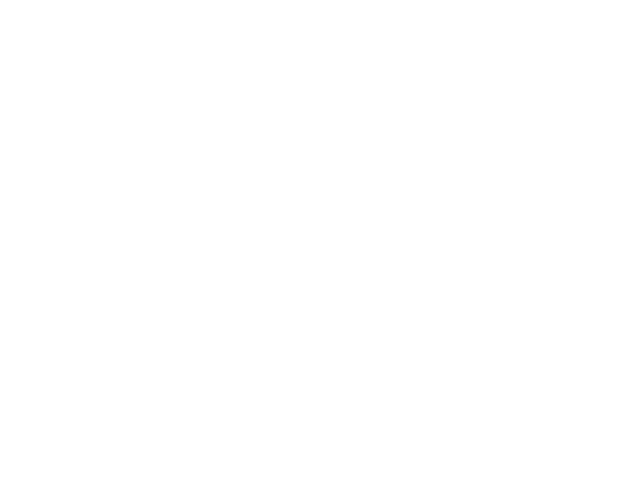

In [12]:
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))

def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


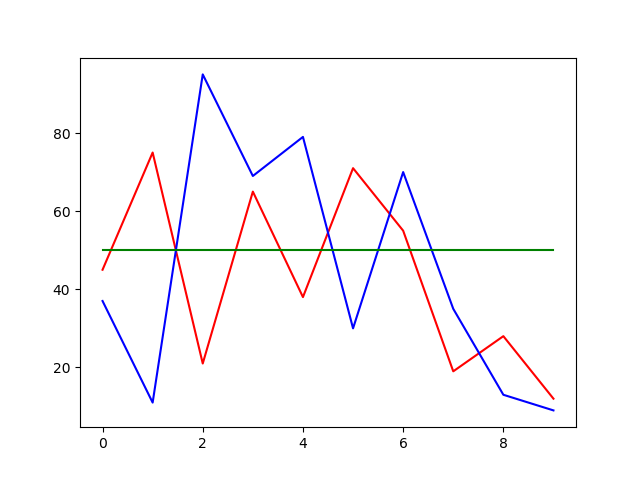

In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import random

plt.figure()

g1 = random.sample(range(1, 100), 10)
g2 = random.sample(range(1, 100), 10)
g3 = np.repeat(50, 10)

l1 = plt.plot(g1, picker = 5, color = 'red')
l2 = plt.plot(g2, picker = 5, color = 'blue')
l3 = plt.plot(g3, picker = 5, color = 'green')

In [14]:
def onpick(event):
    return plt.gca()
    plt.gca().set_title('Selected')
    print(matplotlib.artist.Artist.get_picker)
    
    #l1[i].contains(event)
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7